In [42]:
# Loading and parsing data

# PLOT - parse data + std-dev
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import ticker
from scipy import stats

sns.set(rc={'figure.figsize':(8,4)})
sns.set_style("whitegrid")

def p50_estimator(x):
    return np.percentile(x, 50)
def p95_estimator(x):
    return np.percentile(x, 95)
def p99_estimator(x):
    return np.percentile(x, 99)

data_path = "." #os.path.join(os.path.pardir, os.path.pardir, 'data', 'invocation_latency_small')

# read Ethernet
dfs = []
#for size in [1, 2,3,4,5]
disk_swapping = pd.read_csv(os.path.join('disk_swapping', f'subprocess.csv'),usecols=[1,2])#,skiprows=1)
    #data['size'] = size
    #data['time'] = data['Mean Latency Microseconds']
    #data['time'] /= 1000.0
#    dfs.append(data)
#disk_swapping = pd.concat(dfs, axis=1)
#disk_swapping['type'] = 'disk_swapping'
#disk_swapping["id"] = disk_swapping.index
#print(disk_swapping)
#disk_swapping = pd.melt(disk_swapping, id_vars=['size'], value_vars=['time'])
disk_swapping['time'] /= 1000*1000
disk_swapping['size'] /= 1024
disk_swapping['type'] = 'disk_swapping'
#print(disk_swapping.groupby(['size']).mean())
#print(disk_swapping.groupby(['size']).std())
#print(pd.wide_to_long(disk_swapping,["A", "B"], i="id", j="time"))
#print(ethernet_data)
print(disk_swapping)

dfs = []
for size in [4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 10240]:
    data = pd.read_csv(os.path.join(data_path, 'disk_allocation', f'allocation_{size}'))
    data.set_index('id', drop=True, inplace=True)
    data['size'] = size
    data['time'] /= 1000.0 * 1000.0
    dfs.append(data)
disk_allocation = pd.concat(dfs, axis=0)
disk_allocation['type'] = 'disk_allocation'
print(disk_allocation)
# read AWS data


dfs = []
for size in [4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 10240]:
    data = pd.read_csv(os.path.join(data_path, 'allocation_s3', f'allocation_{size}'))
    data.set_index('id', drop=True, inplace=True)
    data['size'] = size
    data['time'] /= 1000.0 * 1000.0
    dfs.append(data)
s3_allocation = pd.concat(dfs, axis=0)
s3_allocation['type'] = 's3_allocation'
print(s3_allocation)
# read AWS data


dfs = []
for size in [4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 10240]:
    data = pd.read_csv(os.path.join(data_path, 'allocation', f'allocation_{size}'))
    data.set_index('id', drop=True, inplace=True)
    data['size'] = size
    data['time'] /= 1000.0 * 1000.0
    dfs.append(data)
pure_allocation = pd.concat(dfs, axis=0)
pure_allocation['type'] = 'pure_allocation'
print(pure_allocation)
# read AWS data

# read Ethernet
dfs = []
#for size in [1, 2,3,4,5]
s3_swapping = pd.read_csv(os.path.join('s3_swapping_second', f'subprocess.csv'),usecols=[1,2])#,skiprows=1)
s3_swapping['time'] /= 1000*1000
s3_swapping['type'] = 's3_swapping'
s3_swapping['size'] /= 1024

print(s3_swapping)


data = pd.concat([disk_swapping,disk_allocation,s3_swapping,s3_allocation,pure_allocation], axis=0)
print(data)

        size       time           type
0        4.0   0.146622  disk_swapping
1        4.0   0.147008  disk_swapping
2        4.0   0.167120  disk_swapping
3        4.0   0.157566  disk_swapping
4        4.0   0.162763  disk_swapping
..       ...        ...            ...
671  10240.0  40.349185  disk_swapping
672  10240.0  40.529959  disk_swapping
673  10240.0  37.532545  disk_swapping
674  10240.0  36.270940  disk_swapping
675  10240.0  33.028179  disk_swapping

[676 rows x 3 columns]
          time   size             type
id                                    
0    19.547111      4  disk_allocation
1    16.502332      4  disk_allocation
2    15.307174      4  disk_allocation
3   119.768455      4  disk_allocation
4    18.989233      4  disk_allocation
..         ...    ...              ...
46  117.754515  10240  disk_allocation
47   15.237945  10240  disk_allocation
48   18.582399  10240  disk_allocation
49   16.966755  10240  disk_allocation
50   18.155600  10240  disk_allocation



<ipython-input-64-d0b14cf8c93a>:31: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.set_xscale("log", basex=2)


[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725), (0.8666666666666667, 0.5176470588235295, 0.3215686274509804), (0.3333333333333333, 0.6588235294117647, 0.40784313725490196), (0.7686274509803922, 0.3058823529411765, 0.3215686274509804), (0.5058823529411764, 0.4470588235294118, 0.7019607843137254), (0.5764705882352941, 0.47058823529411764, 0.3764705882352941), (0.8549019607843137, 0.5450980392156862, 0.7647058823529411), (0.5490196078431373, 0.5490196078431373, 0.5490196078431373), (0.8, 0.7254901960784313, 0.4549019607843137), (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]


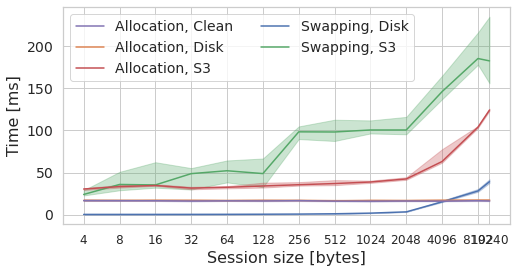

In [64]:
# PLOT - non-parametric CI


import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import ticker
from scipy import stats
import math

sns.set(rc={'figure.figsize':(8,4)})
sns.set_style("whitegrid")

def p50_estimator(x):
    return np.percentile(x, 50)
def p95_estimator(x):
    return np.percentile(x, 95)
def p99_estimator(x):
    return np.percentile(x, 99)


ax = plt.gca()
legend_ethernet = []

plt = sns.lineplot(x="size", y="time", hue='type', ci=None, estimator=p50_estimator, data=data, ax=ax)



ax.set_xscale("log", basex=2)
#ax.set_yscale("log")
ax.set_xticks([1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096,8192,10240])
ax.xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
#ax.set_yticks([4,5,6,10,20])
ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax.set_xlabel('Session size [bytes]',fontsize=16)
ax.set_ylabel('Time [ms]',fontsize=16)

ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=14)

handles, labels = ax.get_legend_handles_labels()

# explain in caption what doted lines are
labels = ["Swapping, Disk", "Allocation, Disk", "Swapping, S3", "Allocation, S3", "Allocation, Clean"]

labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
#ax.legend(handles, labels, ncol=4, bbox_to_anchor=(0.52, -0.44), loc='lower center', fontsize=12)
ax.legend(handles, labels, ncol=2, loc='upper left', fontsize=14)

sizes = np.array([4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096,8192,10240])
low = np.zeros(sizes.shape)
high = np.zeros(sizes.shape)

col_palette = sns.color_palette()
print(col_palette)
#full_data = pd.concat([data, ethernet_data], axis=0)
for idx, data_type in enumerate(['disk_swapping','disk_allocation','s3_swapping','s3_allocation','pure_allocation']):

    i = 0
    data2 = data.loc[(data['type'] == data_type)]
    for row, group in data2.groupby(['size']):
        d = np.sort(group['time'])
        n = len(d)
        low_pos = int(math.floor( (n - 1.96*math.sqrt(n)) / 2))
        high_pos = int(math.ceil(1 +  (n + 1.96*math.sqrt(n)) / 2))
        #print(f'{data_type}, {row}, Non-param 95, {d[low_pos]}, {d[int(n/2)]}, {d[high_pos]}')
        low_pos = int(math.floor( (n - 2.456*math.sqrt(n)) / 2))
        high_pos = int(math.ceil(1 +  (n + 2.456*math.sqrt(n)) / 2))
        #print(f'{data_type}, {row}, Non-param 99, {d[low_pos]}, {d[int(n/2)]}, {d[high_pos]}')
        low[i] = d[low_pos]
        high[i] = d[high_pos]
        i += 1

    indices = {
        0:0,
        1:1,
        2:2,
        3:3,
        4:4
    }
    #low -= 0.5
    #high += 0.5
    plt.fill_between(sizes, low, high, alpha=.3, color=col_palette[indices[idx]])
    
    
plt.figure.savefig("plot_nonparametric_ci_smaller.pdf",bbox_inches='tight',pad_inches = 0, transparent=False)

NameError: name 'ethernet_data' is not defined

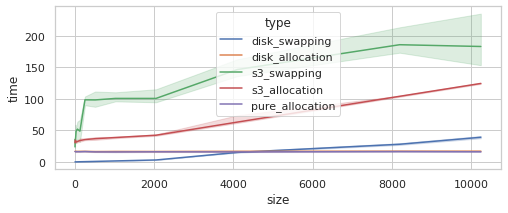

In [56]:
# PLOT - non-parametric CI, but smaller.

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import ticker
from scipy import stats
import math

sns.set(rc={'figure.figsize':(8,3)})
sns.set_style("whitegrid")

def p50_estimator(x):
    return np.percentile(x, 50)
def p95_estimator(x):
    return np.percentile(x, 95)
def p99_estimator(x):
    return np.percentile(x, 99)


ax = plt.gca()
legend_ethernet = []

plt = sns.lineplot(x="size", y="time", hue='type', ci=99, estimator=p50_estimator, data=data, ax=ax)
sns.lineplot(x="size", y="Mean Latency Microseconds",data=ethernet_data, color='red', ax=ax)
legend_ethernet.append(ax.lines[-1])

sns.lineplot(x="size", y="time", hue='type', ci=None, estimator=p99_estimator, data=data, ax=ax)
# I don't know why but matplotlib has 4 lines here: 2 are plotted, 2 are used as legend labels
ax.lines[-4].set_linestyle("dotted")
ax.lines[-5].set_linestyle("dotted")
ax.lines[-6].set_linestyle("dotted")

sns.lineplot(x="size", y="99th Percentile Latency Microseconds", data=ethernet_data, color='red', ax=ax)
ax.lines[-1].set_linestyle("dotted")
legend_ethernet.append(ax.lines[-1])

ax.set_xscale("log", basex=2)
ax.set_yscale("log")
ax.set_xticks([1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096])
ax.xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax.set_yticks([4,5,6,10,20])
ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax.set_xlabel('Message size [bytes]',fontsize=16)
ax.set_ylabel('RTT time [usec]',fontsize=16)

ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=14)

handles, labels = ax.get_legend_handles_labels()
# I don't know why but matplotlib doesn't import the style for some lines
handles[3].set_linestyle("--")
handles[4].set_linestyle("--")
handles[5].set_linestyle("--")

handles = handles + legend_ethernet
# explain in caption what doted lines are
labels = ["RDMA, Median", "rFaaS Hot, Median", "rFaaS Warm, Median", "_RDMA, P99", "_rFaaS Hot, P99", "_rFaaS Warm, P99", "TCP/IP, Mean","_TCP/IP, P99"]
labels = ["RDMA", "rFaaS Hot", "rFaaS Warm", "_RDMA, P99", "_rFaaS Hot, P99", "_rFaaS Warm, P99", "TCP/IP","_TCP/IP, P99"]

labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
ax.legend(handles, labels, ncol=4, bbox_to_anchor=(0.52, -0.44), loc='lower center', fontsize=12)


sizes = np.array([1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096])
low = np.zeros(sizes.shape)
high = np.zeros(sizes.shape)

col_palette = sns.color_palette()
#full_data = pd.concat([data, ethernet_data], axis=0)
for idx, data_type in enumerate(['perftest', 'serverless_hot', 'serverless_warm']):

    i = 0
    data2 = data.loc[(data['type'] == data_type)]
    for row, group in data2.groupby(['size']):
        d = np.sort(group['time'])
        n = len(d)
        low_pos = int(math.floor( (n - 1.96*math.sqrt(n)) / 2))
        high_pos = int(math.ceil(1 +  (n + 1.96*math.sqrt(n)) / 2))
        print(f'{data_type}, {row}, Non-param 95, {d[low_pos]}, {d[int(n/2)]}, {d[high_pos]}')
        low_pos = int(math.floor( (n - 2.456*math.sqrt(n)) / 2))
        high_pos = int(math.ceil(1 +  (n + 2.456*math.sqrt(n)) / 2))
        print(f'{data_type}, {row}, Non-param 99, {d[low_pos]}, {d[int(n/2)]}, {d[high_pos]}')
        low[i] = d[low_pos]
        high[i] = d[high_pos]
        i += 1

    indices = {
        0:0,
        1:3,
        2:2
    }
    #low -= 0.5
    #high += 0.5
    plt.fill_between(sizes, low, high, alpha=.3, color=col_palette[indices[idx]])


ax.annotate('Inlining effects', xy=(150, 4.5), xytext=(400, 4),fontsize=16,#fontweight='bold',
            ha="left", va="center",
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

ax.annotate('rFaaS hot latency: 3.96 usec', xy=(1, 4), xytext=(1, 6),fontsize=16,#fontweight='bold',
            ha="left", va="center",
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

ax.annotate('rFaaS warm latency: 8.2 usec', xy=(1, 8), xytext=(1, 11.5),fontsize=16,#fontweight='bold',
            ha="left", va="center",
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

plt.figure.savefig("plot_nonparametric_ci_smaller.pdf",bbox_inches='tight',pad_inches = 0, transparent=False)